(100, 3)


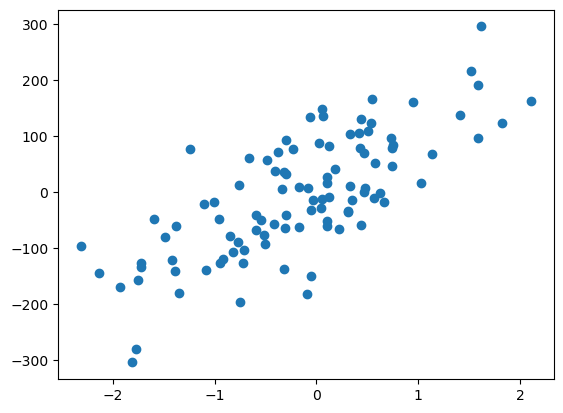

In [303]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
"""On ajoute 2 feature, x deviendra donc une matrice et plus un vecteur. On ne peu plus afficher cette matrice avec
plt.scatter, mais on doit afficher une variable à la fois."""
x, y = make_regression(n_samples = 100, n_features = 2, noise = 10)
plt.scatter(x[:,0], y)
y = y.reshape(100, 1)
""" On doit intégrer dans X, la simple colonne de 1, dans la matrice X on prend x qui contient déjà nos 2 varaibles x1 et x2 et mettre
la grande colonne de 1."""
"""Donc np.ones doit prendre la dimension de x.shape [0] donc 100 lignes et 1 colonne."""
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
""" On garde notre vecteur de dimension theta = (3, 1)"""
theta = np.random.randn(3, 1)

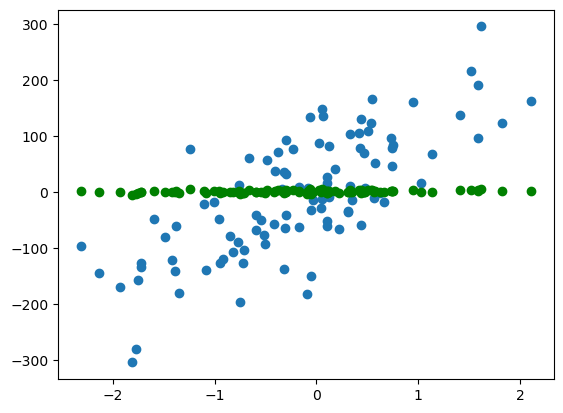

In [305]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c = 'g')

In [307]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y) **2)

In [309]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [311]:
def gradiant_descent(X, y, theta, learning_rate, n_iteration):

    cost_history = np.zeros(n_iteration)

    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [313]:
n_iteration = 1000
learning_rate = 0.01

theta_final, cost_history = gradiant_descent(X, y, theta, learning_rate, n_iteration)

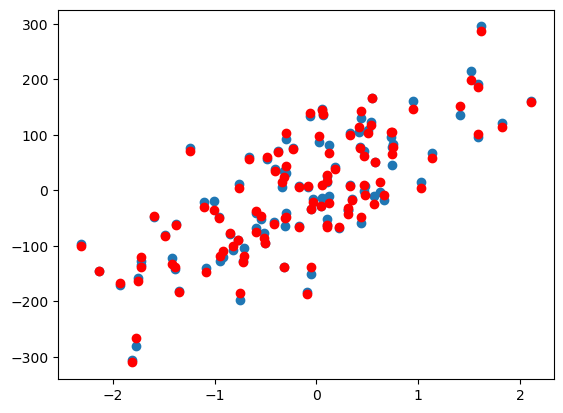

In [321]:
prediction = model(X, theta_final)
""" Nouveau modèle, avec une régression linéaire multiple, on developpe des modèles à plusieurs dimensions / variables"""
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], prediction, c = 'r')

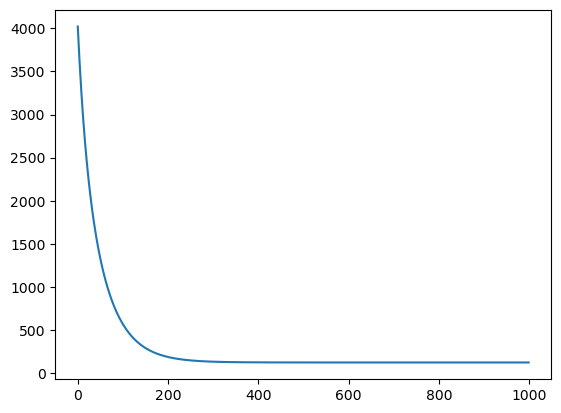

In [287]:
plt.plot(range(n_iteration), cost_history)

In [289]:
def coef_determinator(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [291]:
coef_determinator(y, prediction)

0.96290342743843

In [337]:
""" Vu que c'est un modèle à plusieurs dimensions, on va le visualiser en 3D."""

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Configuration pour Jupyter interactive
%matplotlib notebook

# Création de la figure
fig = plt.figure(figsize=(10, 8))

# Ajout d'un subplot 3D
ax = fig.add_subplot(111, projection='3d')

# Création des scatter plots
ax.scatter(x[:,0], x[:,1], y, label='Points réels')  # Points réels
ax.scatter(x[:,0], x[:,1], prediction, label='Prédiction', c='r')  # Prédictions en rouge

# Ajout des labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Valeur')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>